In [2]:
from google.colab import files
import io

# To upload from your local drive
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

advertisement_data = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))
# Dataset is now stored in a Pandas Dataframe
advertisement_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### **Understanding Data**

In [5]:
advertisement_data.shape

(200, 4)

In [6]:
advertisement_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
advertisement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### **Data cleaning**

In [8]:
advertisement_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### **Visualization**

In [9]:
!pip install matplotlib

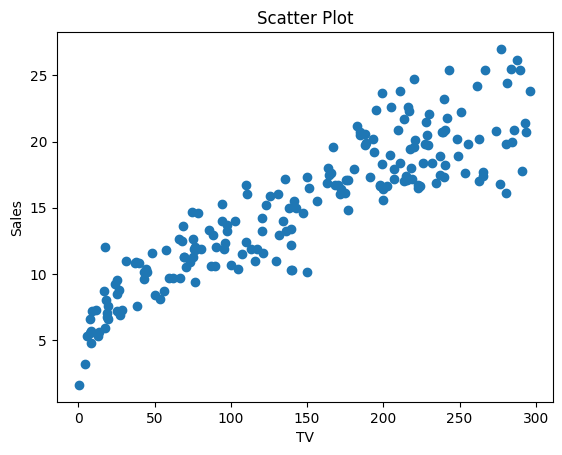

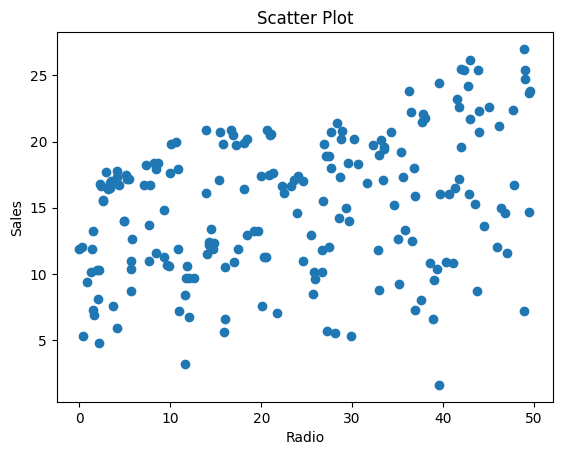

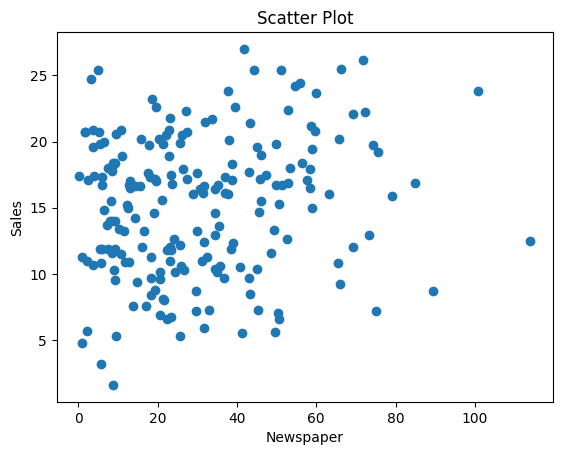

In [10]:
import matplotlib.pyplot as plt

# Scatter plot with day against tip
plt.scatter(advertisement_data['TV'], advertisement_data['Sales'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('TV')
plt.ylabel('Sales')

plt.show()

print()

# Scatter plot with day against tip
plt.scatter(advertisement_data['Radio'], advertisement_data['Sales'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.show()

print()

# Scatter plot with day against tip
plt.scatter(advertisement_data['Newspaper'], advertisement_data['Sales'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.show()

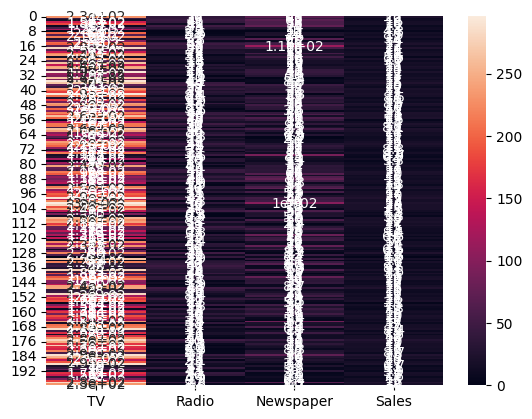

In [11]:
# importing the modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# # generating 2-D 10x10 matrix of random numbers
# # from 1 to 100
# data = np.random.randint(low=1,
#                          high=100,
#                          size=(10, 10))

# plotting the heatmap
hm = sns.heatmap(data=advertisement_data,
                annot=True)

# displaying the plotted heatmap
plt.show()

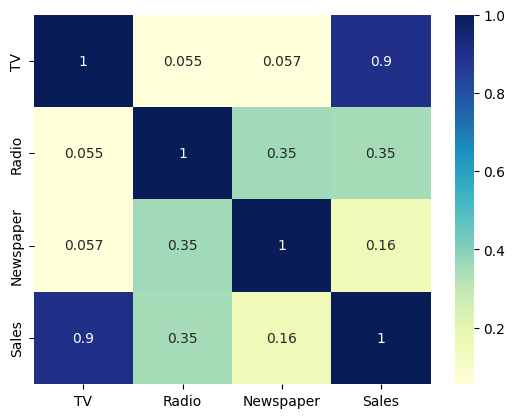

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(advertisement_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# the feature TV seems to be most correlated with Sales

### **Model Building**

In [27]:
# Performing Simple Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# X = advertisement_data['TV']
# y = advertisement_data['Sales']
Y = advertisement_data['Sales']
X = advertisement_data.drop(['Sales'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [28]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [29]:
Y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [30]:
# loading the linear regression model
lin_reg_model = LinearRegression()
# Now we can fit the model to our dataset
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [31]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [32]:
# R squared Error
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.9001416005862131


In [33]:
# prediction on Training data

Y_pred = lin_reg_model.predict(X_test)

In [34]:
# R squared Error

test_error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.9059011844150826


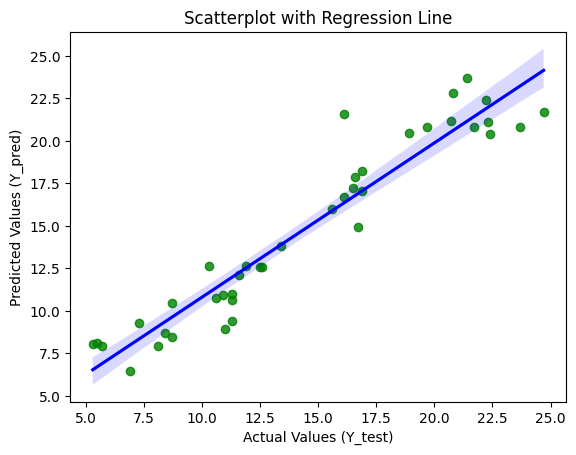

In [36]:
# create scatterplot with regression line

# create scatterplot with regression line
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

# Add labels and title
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_pred)")
plt.title("Scatterplot with Regression Line")

# Show the plot
plt.show()

# sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})